In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("/Users/juhn/Desktop/stady_file/資料整理/鐵達尼號/train.csv",encoding="utf-8")
test = pd.read_csv("/Users/juhn/Desktop/stady_file/資料整理/鐵達尼號/test.csv",encoding="utf-8")

In [3]:
# 先看一下有多少缺失值
# 統計缺失值
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
# 設定中位數
median = train.median(numeric_only=True)
train = train.fillna(median)
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
median = test.median(numeric_only=True)
test = test.fillna(median)
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [7]:
most = train["Embarked"].value_counts().idxmax()
train["Embarked"] = train["Embarked"].fillna(most)

In [8]:
most = test["Embarked"].value_counts().idxmax()
test["Embarked"] = test["Embarked"].fillna(most)
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S


In [9]:
dummy = pd.get_dummies(train["Embarked"]).astype("int64")
dummy

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [10]:
train = pd.concat([train,dummy],axis=1)
train
train = train.drop("Embarked",axis=1)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1,0,0


In [11]:
test.sample(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
144,1036,1,"Lindeberg-Lind, Mr. Erik Gustaf (Mr Edward Lin...",male,42.00,0,0,17475,26.5500,NaN,S
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.00,1,0,19877,78.8500,C46,S
293,1185,1,"Dodge, Dr. Washington",male,53.00,1,1,33638,81.8583,A34,S
72,964,3,"Nieminen, Miss. Manta Josefina",female,29.00,0,0,3101297,7.9250,NaN,S
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.8292,NaN,Q
68,960,1,"Tucker, Mr. Gilbert Milligan Jr",male,31.00,0,0,2543,28.5375,C53,C
148,1040,1,"Crafton, Mr. John Bertram",male,27.00,0,0,113791,26.5500,NaN,S
201,1093,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,NaN,S
254,1146,3,"Wenzel, Mr. Linhart",male,32.50,0,0,345775,9.5000,NaN,S


In [12]:
dummy = pd.get_dummies(test["Embarked"]).astype("int64")
test = pd.concat([test,dummy],axis=1)
test.drop("Embarked",axis=1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,0,1
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,0,0,1


In [13]:
train_sex = pd.get_dummies(train["Sex"]).astype("int64")
test_sex = pd.get_dummies(test["Sex"]).astype("int64")
train = pd.concat([train,train_sex],axis=1)
test = pd.concat([test,test_sex],axis=1)
train = train.drop("Sex",axis=1)
test = test.drop("Sex",axis=1)

In [14]:
train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,NaN,0,0,1,1,0
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,0,0,0,1


In [15]:
k = "Braund, Mr. Owen Harris"
k = k.split(",")[-1].split(".")[0]
k = k.replace(" ","")
k

'Mr'

In [16]:
def nameflow(s)->str:
    s = s.split(",")[-1].split(".")[0]
    s = s.replace(" ","")
    return s
name  = train["Name"].apply(nameflow)
name

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [17]:
print(name.value_counts())

Name
Mr             517
Miss           182
Mrs            125
Master          40
Dr               7
Rev              6
Mlle             2
Major            2
Col              2
theCountess      1
Capt             1
Ms               1
Sir              1
Lady             1
Mme              1
Don              1
Jonkheer         1
Name: count, dtype: int64


In [18]:
pd.crosstab(name,train["Survived"]).T

Name,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,theCountess
Survived,,,,,,,,,,,,,,,,,
0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [91]:
def name_get(s):
    d = {
        "Master":"Master",
        "Miss":"Miss",
        "Mr":"Mr",
        "Mrs":"Mrs"
    }
    return d.get(s)
name.apply(name_get).sample(20)

178       Mrs
142        Mr
180        Mr
157      Miss
16         Mr
208      Miss
364       Mrs
236        Mr
0          Mr
217        Mr
145        Mr
401        Mr
307    Master
54         Mr
409      Miss
183        Mr
297        Mr
97         Mr
314       Mrs
47         Mr
Name: Name, dtype: object

In [20]:
name = train["Name"].apply(nameflow).apply(name_get)
dummy = pd.get_dummies(name).astype("int64")
train = pd.concat([train,dummy],axis=1)
train = train.drop("Name",axis=1)
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,female,male,Master,Miss,Mr,Mrs
0,1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1,0,0,1,0
1,2,1,1,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0,0,0,1
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0,0,1,0,0
3,4,1,1,35.0,1,0,113803,53.1000,C123,0,0,1,1,0,0,0,0,1
4,5,0,3,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,211536,13.0000,NaN,0,0,1,0,1,0,0,0,0
887,888,1,1,19.0,0,0,112053,30.0000,B42,0,0,1,1,0,0,1,0,0
888,889,0,3,28.0,1,2,W./C. 6607,23.4500,NaN,0,0,1,1,0,0,1,0,0
889,890,1,1,26.0,0,0,111369,30.0000,C148,1,0,0,0,1,0,0,1,0


In [21]:
name = test["Name"].apply(nameflow).apply(name_get)
dummy = pd.get_dummies(name).astype("int64")
test = pd.concat([test,dummy],axis=1)
test = test.drop("Name",axis=1)
test

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S,female,male,Master,Miss,Mr,Mrs
0,892,3,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,0,0,1,0
1,893,3,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,0,1
2,894,2,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,0,1,0
3,895,3,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1,0
4,896,3,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,27.0,0,0,A.5. 3236,8.0500,NaN,S,0,0,1,0,1,0,0,1,0
414,1306,1,39.0,0,0,PC 17758,108.9000,C105,C,1,0,0,1,0,0,0,0,0
415,1307,3,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,1,0,1,0,0,1,0
416,1308,3,27.0,0,0,359309,8.0500,NaN,S,0,0,1,0,1,0,0,1,0


In [22]:
train = train.drop(["Ticket","Cabin"],axis=1)
test = test.drop(["Ticket","Cabin",	"Embarked"],axis=1)


In [23]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Master,Miss,Mr,Mrs
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,0
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0,0,1
2,3,1,3,26.0,0,0,7.9250,0,0,1,1,0,0,1,0,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,1,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,0,1,0,1,0,0,0,0
887,888,1,1,19.0,0,0,30.0000,0,0,1,1,0,0,1,0,0
888,889,0,3,28.0,1,2,23.4500,0,0,1,1,0,0,1,0,0
889,890,1,1,26.0,0,0,30.0000,1,0,0,0,1,0,0,1,0


In [24]:
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Master,Miss,Mr,Mrs
0,892,3,34.5,0,0,7.8292,0,1,0,0,1,0,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,1,1,0,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,0,1,0,0,1,0
3,895,3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1,0
4,896,3,22.0,1,1,12.2875,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,27.0,0,0,8.0500,0,0,1,0,1,0,0,1,0
414,1306,1,39.0,0,0,108.9000,1,0,0,1,0,0,0,0,0
415,1307,3,38.5,0,0,7.2500,0,0,1,0,1,0,0,1,0
416,1308,3,27.0,0,0,8.0500,0,0,1,0,1,0,0,1,0


In [25]:
# hotmap
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Master,Miss,Mr,Mrs
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658,-0.001205,-0.033606,0.022204,-0.042939,0.042939,-0.026151,-0.073110,0.038850,0.011245
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683,0.543351,-0.543351,0.085221,0.327093,-0.549199,0.339040
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053,-0.131900,0.131900,0.082081,-0.000576,0.142698,-0.149209
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.030248,-0.031415,-0.006729,-0.081163,0.081163,-0.373960,-0.247483,0.180808,0.169578
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734,0.114631,-0.114631,0.349559,0.087932,-0.250489,0.063407
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814,0.245489,-0.245489,0.267344,0.105567,-0.333905,0.225852
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184,0.182333,-0.182333,0.010908,0.118271,-0.183766,0.105203
C,-0.001205,0.168240,-0.243292,0.030248,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742,0.082853,-0.082853,-0.035225,0.026215,-0.072567,0.061395
Q,-0.033606,0.003650,0.221009,-0.031415,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421,0.074115,-0.074115,0.010478,0.171117,-0.078338,-0.089739
S,0.022204,-0.149683,0.074053,-0.006729,0.068734,0.060814,-0.162184,-0.782742,-0.499421,1.000000,-0.119224,0.119224,0.024264,-0.130650,0.112870,0.002689


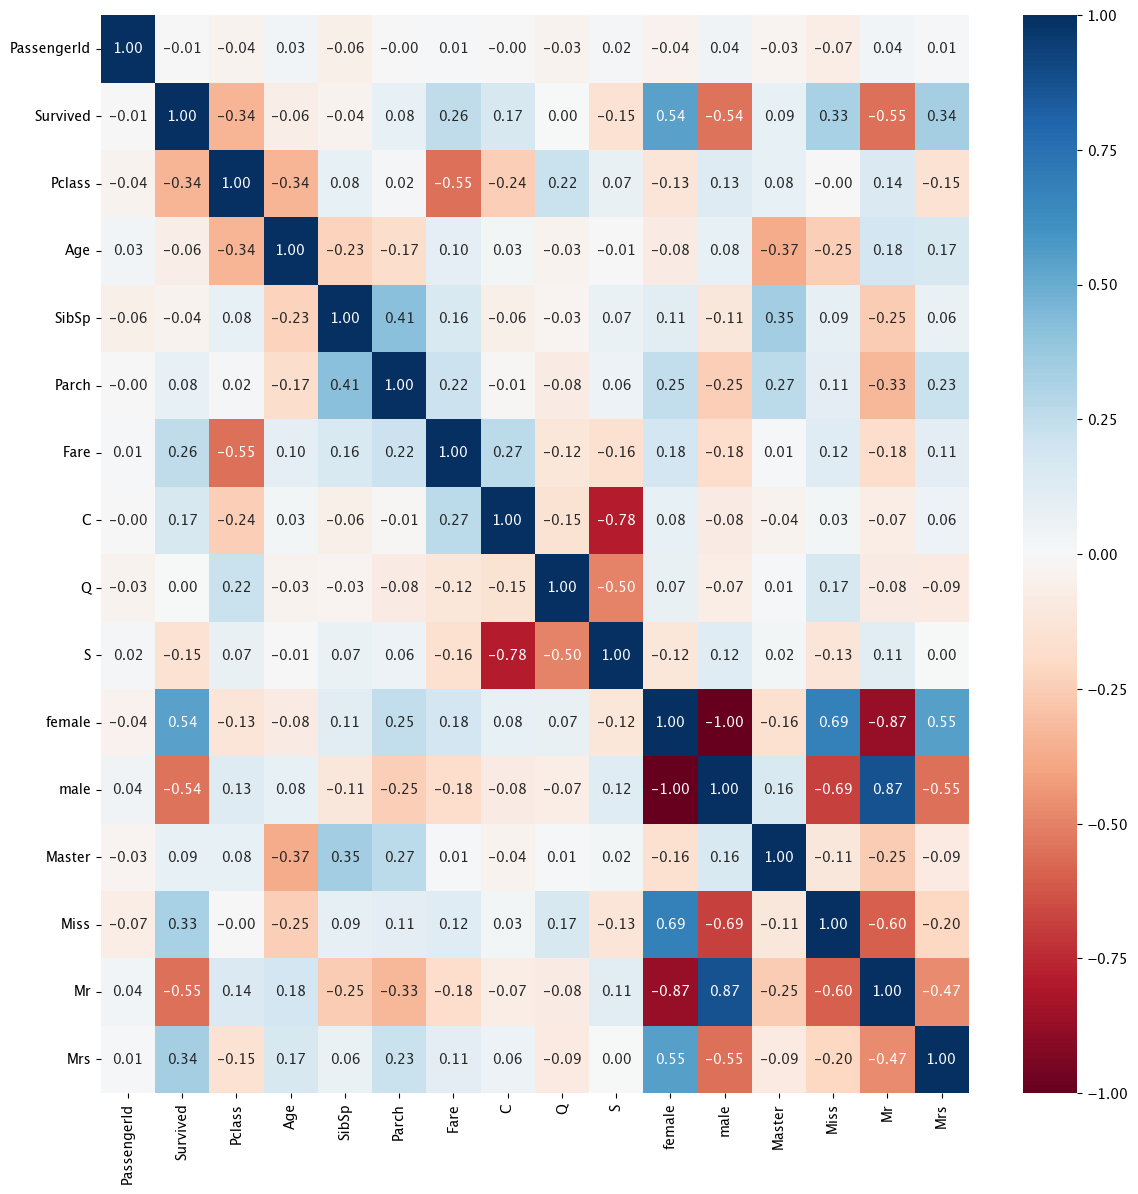

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,14))
sns.heatmap(data=train.corr(),fmt=".2f",annot=True,cmap="RdBu")
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import cross_val_score
trainx = train.drop("Survived",axis=1)
trainy = train["Survived"]
clf = RandomForestClassifier(n_estimators=50,max_depth=20)
print(f"{np.average(cross_val_score(clf,trainx,trainy,cv=50)):.2f}")

0.83


In [28]:
from sklearn.model_selection import GridSearchCV
p = {
    "max_depth":list(range(5,11)),
    "n_estimators":list(range(20,31))
}
clf = RandomForestClassifier()
s = GridSearchCV(clf,p,cv=30)
s.fit(trainx,trainy)
print(s.best_params_)
sorce = s.best_score_
print(f"{sorce*100:.2f}%")


{'max_depth': 5, 'n_estimators': 26}
83.38%


In [29]:
test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male,Master,Miss,Mr,Mrs
0,892,3,34.5,0,0,7.8292,0,1,0,0,1,0,0,1,0
1,893,3,47.0,1,0,7.0000,0,0,1,1,0,0,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,0,1,0,0,1,0
3,895,3,27.0,0,0,8.6625,0,0,1,0,1,0,0,1,0
4,896,3,22.0,1,1,12.2875,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,27.0,0,0,8.0500,0,0,1,0,1,0,0,1,0
414,1306,1,39.0,0,0,108.9000,1,0,0,1,0,0,0,0,0
415,1307,3,38.5,0,0,7.2500,0,0,1,0,1,0,0,1,0
416,1308,3,27.0,0,0,8.0500,0,0,1,0,1,0,0,1,0


In [30]:
#testx = test.drop("PassengerId",axis=1)
PassengerID = test["PassengerId"]
clf = RandomForestClassifier(n_estimators=30,max_depth=10)
clf.fit(trainx,trainy)

pre = clf.predict(test)
result = pd.DataFrame()
result["PassengerId"] = PassengerID
result["Survived"] = pre

result.to_csv("result.csv",index=False,encoding="utf-8")

In [31]:
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [32]:
clf.feature_importances_

array([0.11796801, 0.08500158, 0.11962388, 0.05775451, 0.02934269,
       0.14725173, 0.01388504, 0.00708413, 0.01219375, 0.11283942,
       0.13910982, 0.01820934, 0.03308313, 0.09474483, 0.01190814])

In [33]:
trainx.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q', 'S',
       'female', 'male', 'Master', 'Miss', 'Mr', 'Mrs'],
      dtype='object')